In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 경제성장률 구하기

In [ ]:
df = pd.read_csv('./drive/MyDrive/공유문서함/산업별대출금(예금은행, 전산업)_20133106.csv', index_col=0)

In [ ]:
df

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
통계표,,,,,,,,,,,,,,,,,,,,,
산업별대출금,86060.9,99191.5,105590.7,109838.5,117702.9,127470.8,149836.5,187250.7,196556.7,207259.5,...,287606.6,302617.1,300677.2,310390.4,316915.4,323125.6,348906.0,365247.5,393850.7,420377.8


In [ ]:
df.drop(['Unnamed: 1','단위','변환'],axis=1, inplace=True)

In [ ]:
df.reset_index(drop=True)

,계정항목,단위,변환,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,제조업,십억원,원자료,"86,060.9","99,191.5","105,590.7","109,838.5","117,702.9","127,470.8","149,836.5",...,"287,606.6","302,617.1","300,677.2","310,390.4","316,915.4","323,125.6","348,906.0","365,247.5","393,850.7","420,377.8"


In [ ]:
df2 =df.T

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2001 to 2023
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   산업별대출금  23 non-null     float64
dtypes: float64(1)
memory usage: 924.0+ bytes


In [ ]:
pct_change_df = df2.pct_change()+1

In [ ]:
pct_change_df

통계표,산업별대출금
2001,NaN
2002,1.152573
2003,1.064514
2004,1.040229
2005,1.071600
2006,1.082988
2007,1.175457
2008,1.249700
2009,1.049698
2010,1.054451


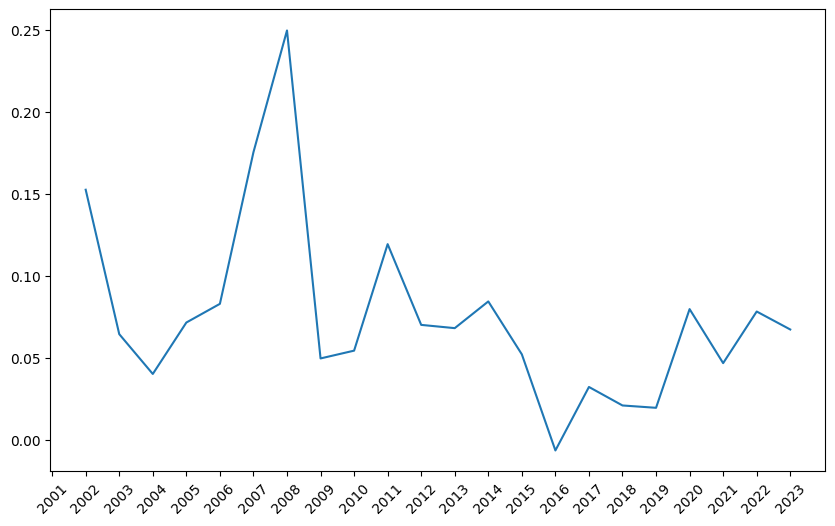

In [ ]:
# seaborn을 사용하여 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
ax = sns.lineplot(data=pct_change_df, palette='tab10')  # 색상 조정

# 범례 없애기
ax.legend_.remove()

# x축 라벨 회전
plt.xticks(rotation=45)

plt.show()

# 산업분류

In [5]:
major = pd.read_csv('./drive/MyDrive/공유문서함/상장csv/240317_상장주력전처리완료(거시합침).csv', index_col=0)
minor = pd.read_csv('./drive/MyDrive/공유문서함/상장csv/240317_상장비주력전처리완료(거시합침).csv', index_col=0)
major.head(1)

,회사명,회계년도,매출액총이익률,매출액정상영업이익률,매출액순이익률,총자본사업이익률,총자본정상영업이익률,총자본순이익률,자기자본정상영업이익률,자기자본순이익률,...,아연가격,금가격,수출물가지수총지수 (2015=100),수입물가지수총지수 (2015=100),소비자물가지수,수입물량지수,수입금액지수,수출물량지수,수출금액지수,생산자물가지수
0,제이앤유글로벌,2014-12-01,13.73,-23.71,-30.69,-12.1,-12.67,-16.41,-20.52,-26.16,...,"2,160.97","1,266.19",-11.9,-5.1,9.1,15.5,24.3,30.5,27.1,5.2


In [4]:
major.shape

(6507, 153)

In [6]:
minor.shape

(4653, 153)

In [9]:
display(len(major[major['부실']==1]['회사명'].unique()))
display(len(major[major['부실']==0]['회사명'].unique()))

61

968

In [10]:
display(len(minor[minor['부실']==1]['회사명'].unique()))
display(len(minor[minor['부실']==0]['회사명'].unique()))

33

664

In [11]:
산업분류_사전 = {
    '자동차': ['자동차 신품 부품 제조업', '자동차 차체 및 트레일러 제조업', '자동차용 엔진 및 자동차 제조업', '자동차 및 트레일러 제조업'],
    '조선': ['선박 및 보트 건조업'],
    '일반기계': ['특수 목적용 기계 제조업', '일반 목적용 기계 제조업', '전동기, 발전기 및 전기 변환ㆍ 공급ㆍ제어 장치 제조업', '1차 비철금속 제조업', '측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외', '금속 주조업', '의료용 기기 제조업', '기타 전기장비 제조업', '시계 및 시계부품 제조업', '의료, 정밀, 광학기기 및 시계 제조업', '전기장비 제조업'],
    '철강': ['1차 철강 제조업', '코크스, 연탄 및 석유정제품 제조업', '1차 금속 제조업', '코크스 및 연탄 제조업'],
    '섬유': ['직물직조 및 직물제품 제조업', '섬유제품 염색, 정리 및 마무리 가공업', '기타 섬유제품 제조업', '방적 및 가공사 제조업', '편조원단 제조업', '섬유제품 제조업; 의복제외', '화학섬유 제조업'],
    '석유화학': ['플라스틱제품 제조업', '기타 화학제품 제조업', '기초 화학물질 제조업', '합성고무 및 플라스틱 물질 제조업', '고무제품 제조업', '항공기, 우주선 및 부품 제조업', '화학물질 및 화학제품 제조업; 의약품 제외', '고무 및 플라스틱제품 제조업'],
    '정유': ['석유 정제품 제조업'],
    '정보통신기기': ['소프트웨어 개발 및 공급업', '통신 및 방송 장비 제조업','컴퓨터 프로그래밍, 시스템 통합 및 관리업', '절연선 및 케이블 제조업', '컴퓨터 및 주변장치 제조업', '전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업'],
    '가전': ['영상 및 음향기기 제조업', '가정용 기기 제조업', '전구 및 조명장치 제조업', '마그네틱 및 광학 매체 제조업'],
    '반도체': ['반도체 제조업'],
    '이차전지': ['일차전지 및 축전지 제조업'],
    '디스플레이': ['사진장비 및 광학기기 제조업'],
    '바이오헬스': ['기초 의약물질 및 생물학적 제제 제조업', '의약품 제조업', '비료, 농약 및 살균, 살충제 제조업', '의료용품 및 기타 의약 관련제품 제조업', '의료용 물질 및 의약품 제조업'],
    '전자부품 제조업': ['전자부품 제조업']
}


In [12]:

산업별_카운트 = {
    '자동차': 0,
    '조선': 0,
    '일반기계': 0,
    '철강': 0,
    '섬유': 0,
    '석유화학': 0,
    '정유': 0,
    '정보통신기기': 0,
    '가전': 0,
    '반도체': 0,
    '이차전지': 0,
    '디스플레이': 0,
    '바이오헬스': 0,
    '전자부품 제조업':0
}


In [15]:
# '부실'이 1인 행을 선택한 후 '상장협 산업분류(소분류)'와 '회사명' 열만 추출
selected_df = major[major['부실'] == 1][['상장협 산업분류(소분류)_x', '회사명']]
# test_df = test_s[test_s['부실'] == 1][['상장협 산업분류(소분류)', '회사명']]

# final_df = pd.concat([selected_df, test_df])
# 각 산업별로 회사를 묶고, 각 산업에 해당하는 회사의 개수를 계산
산업별_회사_개수 = selected_df.groupby('상장협 산업분류(소분류)_x').size()


# 각 산업별로 산업 카운트 초기화
for idx, row in selected_df.drop_duplicates().iterrows():
    산업분류 = row['상장협 산업분류(소분류)_x']

    # 산업분류 사전에 존재하는지 확인 후 카운트 증가
    for 산업, 분류목록 in 산업분류_사전.items():
        if 산업분류 in 분류목록:
            산업별_카운트[산업] += 1
            break

# 산업별 카운트 출력
print(산업별_카운트)

카운트_합계 = sum(산업별_카운트.values())
print("산업별 카운트 값의 합계:", 카운트_합계)


{'자동차': 2, '조선': 1, '일반기계': 9, '철강': 4, '섬유': 3, '석유화학': 5, '정유': 0, '정보통신기기': 15, '가전': 2, '반도체': 1, '이차전지': 2, '디스플레이': 0, '바이오헬스': 2, '전자부품 제조업': 15}
산업별 카운트 값의 합계: 61


In [23]:
major[major['부실'] == 1][major['상장협 산업분류(소분류)_x']=='전자부품 제조업']['회사명'].unique()

array(['이엘케이', '지디', '트레이스', '레이젠', '우전', '피엘에이', '아이디에스', '플렉스컴', '디아이디',
       '에이스하이텍', '모린스', '태산엘시디', '유일엔시스', '디에스', '미성포리테크'], dtype=object)

In [16]:
# '부실'이 1인 행을 선택한 후 '상장협 산업분류(소분류)'와 '회사명' 열만 추출
selected_df = major[major['부실'] == 0][['상장협 산업분류(소분류)_x', '회사명']]
# test_df = test_s[test_s['부실'] == 1][['상장협 산업분류(소분류)', '회사명']]

# final_df = pd.concat([selected_df, test_df])
# 각 산업별로 회사를 묶고, 각 산업에 해당하는 회사의 개수를 계산
산업별_회사_개수 = selected_df.groupby('상장협 산업분류(소분류)_x').size()


# 각 산업별로 산업 카운트 초기화
for idx, row in selected_df.drop_duplicates().iterrows():
    산업분류 = row['상장협 산업분류(소분류)_x']

    # 산업분류 사전에 존재하는지 확인 후 카운트 증가
    for 산업, 분류목록 in 산업분류_사전.items():
        if 산업분류 in 분류목록:
            산업별_카운트[산업] += 1
            break

# 산업별 카운트 출력
print(산업별_카운트)

카운트_합계 = sum(산업별_카운트.values())
print("산업별 카운트 값의 합계:", 카운트_합계)

{'자동차': 84, '조선': 10, '일반기계': 225, '철강': 44, '섬유': 20, '석유화학': 155, '정유': 4, '정보통신기기': 185, '가전': 28, '반도체': 44, '이차전지': 12, '디스플레이': 9, '바이오헬스': 103, '전자부품 제조업': 105}
산업별 카운트 값의 합계: 1028
